In [69]:
import numpy as np
import csv
import math
import matplotlib.pyplot as plt
import itertools
import pandas as pd

[[2.4492935982947064e-16, 1.0], [-1.0, 3.061616997868383e-16]]


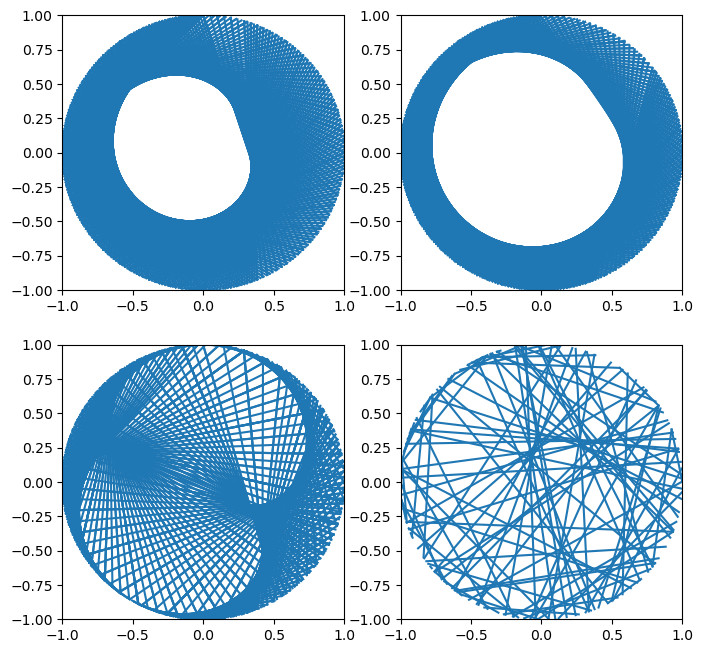

In [70]:
import matplotlib.lines as mlines
import pickle

def rotate(number: int):
    col = number #number - 2**int(math.log2(number)) # omitted substracting 1
    row = int(math.log2(number))
    alpha = 2*math.pi*col/(2**(row+1)-2**row)
    
    #rotate unit vector [0, 1] by "alpha"
    x = -math.sin(alpha) #(0 * cos_a) - (1 * sin_a)
    y = math.cos(alpha) #(0 * sin_a) + (1 * cos_a)
    return (x, y) 

def line(ax, x1, y1, x2, y2):
    ax.add_line(mlines.Line2D([x1,x2], [y1,y2]))

subplot_size=4
subplot_cols=2
subplot_rows=2

fig, ax = plt.subplots(subplot_rows, subplot_cols, figsize=(subplot_size*subplot_cols,subplot_size*subplot_rows), dpi=100)
ax = ax.flatten()

def dreamcatcher(ax, func):
    ax.set_xlim([-1,1])
    ax.set_ylim([-1,1])

    line_coordinates = []
    height=8

    for i in np.arange(1, 100, 0.2):
        x1, y1 = rotate(i)
        x2, y2 = rotate(func(i))
        line_coordinates.append([[x1, y1], [x2, y2]])        
        #plot the line
        line(ax, x1, y1, x2, y2)
    
    return line_coordinates

def dreamcatcher_prime(ax):
    infile = open('primes_179424673.bin', 'rb')
    primes = pickle.load(infile)
    infile.close()

    line_coordinates = []

    ax.set_xlim([-1,1])
    ax.set_ylim([-1,1])

    for i in range(len(primes)):
        if len(primes)<=i**2:
            break
        x1, y1 = rotate(primes[i])
        x2, y2 = rotate(primes[i**2])
        line(ax, x1, y1, x2, y2)
        line_coordinates.append([[x1, y1], [x2, y2]])        
        line(ax, x1, y1, x2, y2)
    
    return line_coordinates

line_coordinates = dreamcatcher(ax[0], lambda number: number*10)
print(line_coordinates[0])

dreamcatcher(ax[1], lambda number: number*19)
dreamcatcher(ax[2], lambda number: number**3)

infile = open('primes_179424673.bin', 'rb')
primes = pickle.load(infile)
infile.close()

ax[3].set_xlim([-1,1])
ax[3].set_ylim([-1,1])

for i in range(len(primes)):
    if len(primes)<=i**2:
        break
    x1, y1 = rotate(primes[i])
    x2, y2 = rotate(primes[i**2])
    line(ax[3], x1, y1, x2, y2)

plt.show()


In [71]:
def line_intersection(line1, line2):
    xdiff = (line1[0][0] - line1[1][0], line2[0][0] - line2[1][0])
    ydiff = (line1[0][1] - line1[1][1], line2[0][1] - line2[1][1])

    def det(a, b):
        return a[0] * b[1] - a[1] * b[0]

    div = det(xdiff, ydiff)
    if div == 0:
       return -1
       #raise Exception('lines do not intersect')

    d = (det(*line1), det(*line2))
    x = det(d, xdiff) / div
    y = det(d, ydiff) / div
    return [x, y]

def get_intersections(line_coordinates):
    intersections = None

    for i in range(len(line_coordinates)-2):
        return_value = line_intersection((line_coordinates[i-1][0], line_coordinates[i-1][1]),(line_coordinates[i][0], line_coordinates[i][1]))
        if return_value != -1:
            if intersections == None:
                intersections = [return_value]
            else:
                intersections.append(return_value)
    return intersections

def get_xy_intersection(intersections):
    intersection_x = None
    intersection_y = None

    for i in intersections:
        if intersection_x == None:
            intersection_x = [i[0]]
            intersection_y = [i[1]]        
        else:
            #print[i]
            intersection_x.append(i[0])
            intersection_y.append(i[1])

    return intersection_x, intersection_y

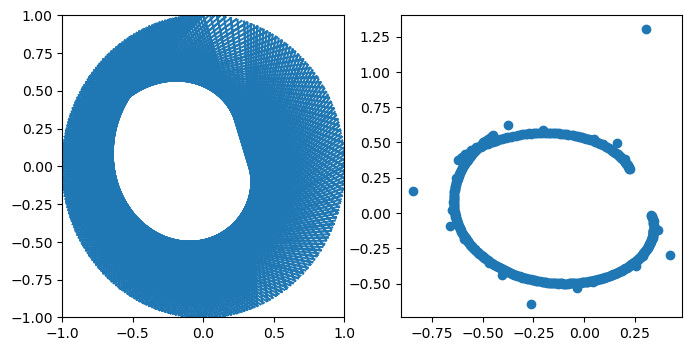

In [72]:
#calc line intersection
subplot_size=4
subplot_cols=2
subplot_rows=1

fig, ax = plt.subplots(subplot_rows, subplot_cols, figsize=(subplot_size*subplot_cols,subplot_size*subplot_rows), dpi=100)
ax = ax.flatten()

line_coordinates = dreamcatcher(ax[0], lambda number: number*10)
# line_coordinates = dreamcatcher(ax[0], lambda number: number**2)
# line_coordinates = dreamcatcher(ax[0], lambda number: number*19)
# line_coordinates = dreamcatcher(ax[0], lambda number: number**3)
# line_coordinates = dreamcatcher_prime(ax[0])
# infile = open('primes_179424673.bin', 'rb')
# primes = pickle.load(infile)
# infile.close

intersections = get_intersections(line_coordinates)
intersection_x, intersection_y = get_xy_intersection(intersections)
ax[1].scatter(intersection_x, intersection_y)
plt.show()
